## Q_2 Epilepsy

Epilepsy is a nervous system disorder that affects movement. The dataset
contains 195 records of various people with 23 features that contain
biomedical measurements. Your model will be used to differentiate
healthy people from people having the disease. Target Column is 'status'.
Identify the model with the best params. Please note: Visualisation is
mandatory. You will receive 0 marks if you do not add visualisation. Data
Link -
https://github.com/edyoda/data-science-complete-tutorial/blob/master
/Data/epilepsy.data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
#url =  'https://github.com/edyoda/data-science-complete-tutorial/blob/master /Data/epilepsy.data'
df = pd.read_csv('epilepsy.data.csv')

In [9]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          193 non-null    float64
 8   Jitter:DDP        194 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [11]:
df.shape

(195, 24)

In [12]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,193.000000,194.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003468,0.009932,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002765,0.008925,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001880,0.004982,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002700,0.007455,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003960,0.011558,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [7]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
## Handling missing values

In [13]:
for col in df.columns:
    if df[col].isna().sum() > 0:
        print(col, ' : ' ,df[col].isna().sum())

MDVP:PPQ  :  2
Jitter:DDP  :  1


In [9]:
df[df['MDVP:PPQ'].isnull()]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
32,phon_R01_S07_3,198.383,215.203,193.104,0.00212,0.00001,0.00113,NaN,0.00339,0.01263,...,0.01919,0.00119,30.775,0,0.465946,0.738703,-7.067931,0.175181,1.512275,0.096320
65,phon_R01_S17_6,228.969,239.541,113.201,0.00238,0.00001,0.00136,NaN,0.00408,0.01745,...,0.02827,0.00420,24.547,0,0.305429,0.681811,-7.314237,0.006274,2.118596,0.091546


In [14]:
df[df['Jitter:DDP'].isnull()]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
26,phon_R01_S06_3,171.041,208.313,75.501,0.00455,0.00003,0.0025,0.00234,NaN,0.01966,...,0.02666,0.01095,25.908,1,0.418622,0.720916,-6.18359,0.226278,2.589702,0.147403


In [15]:
df['MDVP:PPQ'].fillna(df['MDVP:PPQ'].mode()[0], inplace=True)
df['Jitter:DDP'].fillna(df['Jitter:DDP'].mode()[0], inplace=True)

In [16]:
df.isna().any()

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
status              False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool

In [ ]:
## Trying to find Co-relation among the features
## Data Visualization

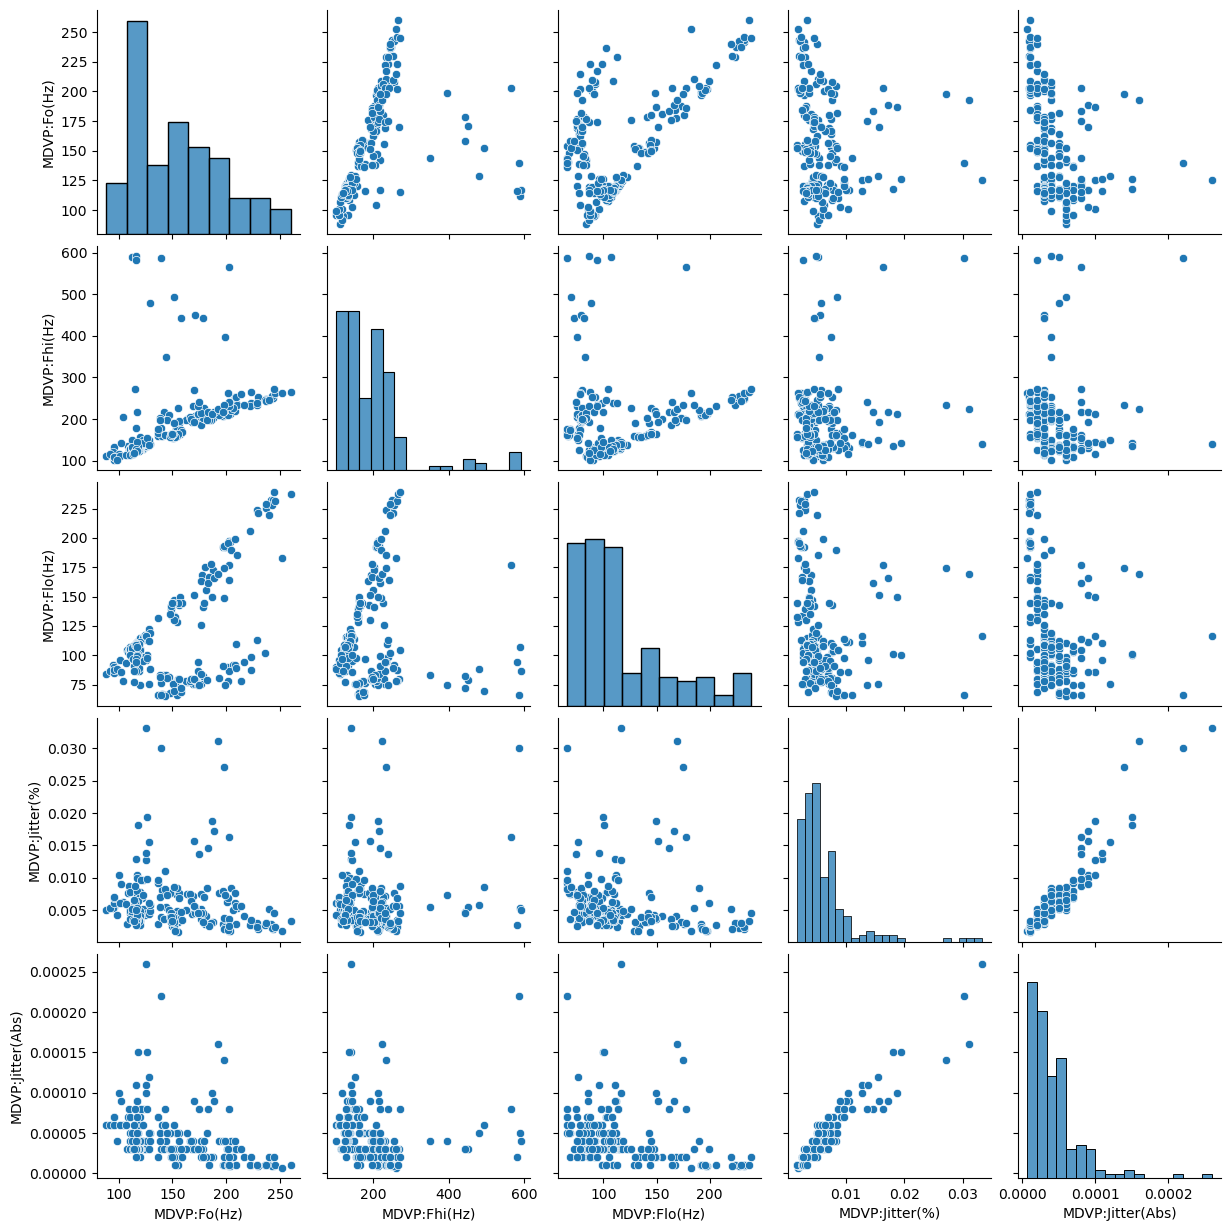

In [70]:
sns.pairplot(df.iloc[:,:5],kind='scatter')

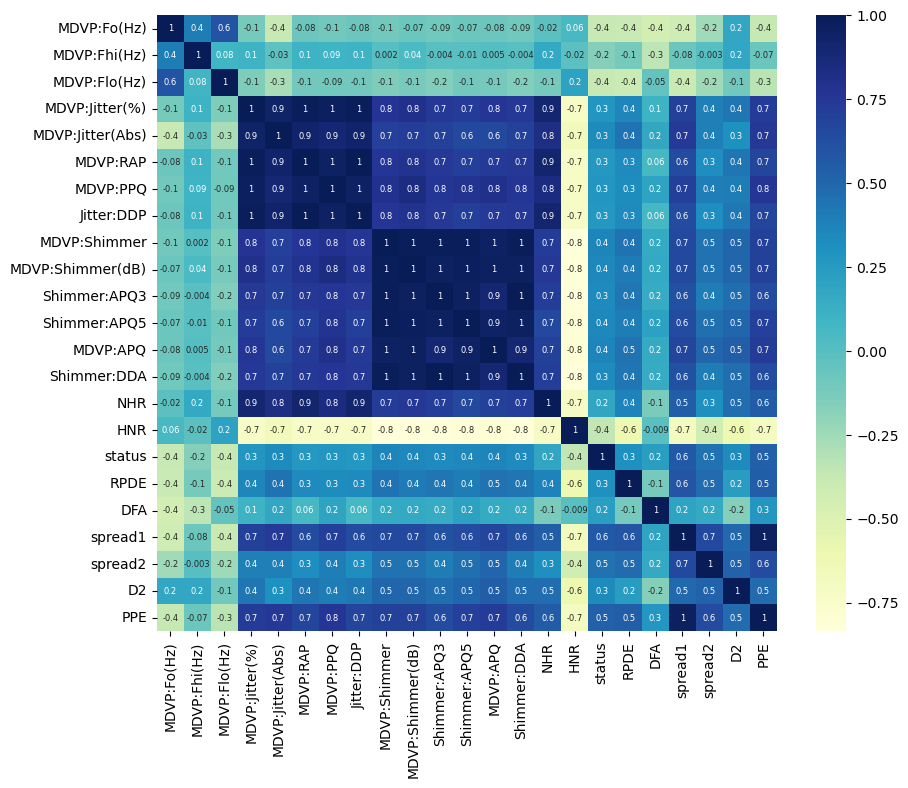

In [17]:
ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df.corr(),cmap='YlGnBu',annot=True, annot_kws = {'size': 6}, fmt='.1g')

<AxesSubplot:>

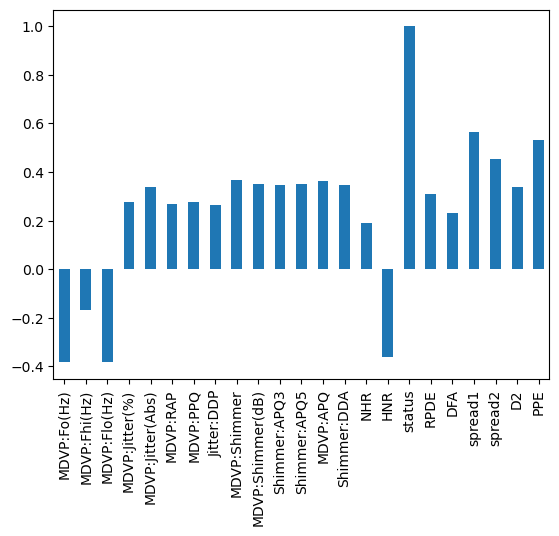

In [64]:
df.corr()['status'].plot(kind='bar')

In [40]:
## Processing target_column

df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [15]:
df.head(1)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.0037,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654


In [17]:
df['name'].isna().

False

In [42]:
##Since df.name is of no relation with the target column we can drop df['name']
df.drop('name',axis=1,inplace=True)
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# Data Pre-processing
## Independent and dependent features


In [ ]:
X = df.drop('status',axis=1)
y = df['status']

In [39]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [44]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

## Train-Test split

In [45]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [89]:
print('X_train : ',X_train.shape)
print('y_train : ',y_train.shape)

X_train :  (156, 22)
y_train :  (156,)


In [90]:
print('X_test : ',X_test.shape)
print('y_test : ',y_test.shape)

X_test :  (39, 22)
y_test :  (39,)


## Feature_Scaling

In [91]:
from sklearn.preprocessing import StandardScaler

In [93]:
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [94]:
X_train = ss.transform(X_train)

In [95]:
print(X_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


In [96]:
X_test = ss.transform(X_test)

In [97]:
print(X_test)

[[-1.70008583e+00 -9.67968410e-01 -7.70130215e-01 -2.75000683e-01
   4.16156683e-01 -2.92615113e-01 -1.05885515e-01 -2.89801540e-01
  -4.94706656e-01 -4.90058396e-01 -5.32488171e-01 -4.26848854e-01
  -3.60251422e-01 -5.32484688e-01 -3.57189713e-01 -1.08840337e-01
   1.06963705e+00  1.05628304e+00  3.72180199e-01  1.94886208e+00
   3.66935071e-02  4.44314482e-01]
 [-1.39044095e+00 -9.29681132e-01 -7.37045677e-01  7.42068829e-01
   1.50451280e+00  8.54349819e-01  7.27816277e-01  8.54258037e-01
  -3.12538562e-03  3.01660094e-01  1.16511011e-01 -7.67595149e-02
  -2.23967413e-01  1.16829276e-01 -1.19644974e-01 -5.22790834e-01
   9.12650090e-01  1.31721995e+00  6.70118138e-01  4.74318608e-01
   1.42454868e-02  7.46859799e-01]
 [-1.35302065e+00 -6.29175292e-01 -7.29027225e-01  4.92094897e-01
   1.23242377e+00  4.52288742e-01  3.38077634e-01  4.54563901e-01
  -1.57435662e-01 -1.27992014e-01 -6.49095096e-02 -2.59345791e-01
  -2.60383383e-01 -6.52155416e-02  2.54927471e-01 -6.85306331e-01
   1.6

## Model Building
1. Logistic Regression
2. Random Forest Classifier
2. SVM Classifier
3. XGB Classifier

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
lr = LogisticRegression(max_iter=100)

In [73]:
lr.fit(X_train,y_train)

LogisticRegression()

In [74]:
X_pred = lr.predict(X_train)

In [123]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix

In [76]:
X_accuracy = accuracy_score(y_train,X_pred)
X_accuracy

0.863013698630137

In [77]:
y_pred = lr.predict(X_test)

In [78]:
accuracyscore = accuracy_score(y_pred,y_test)
print('The accuracy score for Logistic Regression Model : ',accuracyscore)

The accuracy score for Logistic Regression Model :  0.7755102040816326


##

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_RFC = rfc.predict(X_test)
accuracyscoreRFC = accuracy_score(y_test,y_pred_RFC)
print('The accuracy score for Random Forest Classifier Model : ',accuracyscoreRFC)

The accuracy score for Random Forest Classifier Model :  0.8163265306122449


In [98]:
from sklearn import svm
from sklearn.svm import LinearSVC

In [99]:
svc = LinearSVC()

In [100]:
svc.fit(X_train, y_train)

LinearSVC()

In [117]:
X_pred_svc = svc.predict(X_train)
accuracyscoreSVC = accuracy_score(y_train,X_pred_svc)

In [116]:
y_pred_svc = svc.predict(X_test)
accuracy_score(y_pred_svc,y_test)

print('The accuracy score for Support Vector Classifier Model : ',accuracyscoreSVC)

The accuracy score for Support Vector Classifier Model :  0.8846153846153846


In [120]:
print(confusion_matrix(y_test,y_pred_svc))

[[ 5  3]
 [ 6 25]]


C:\Users\nithin\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


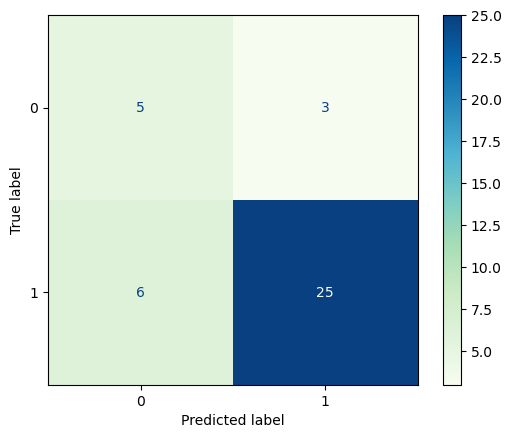

In [138]:
plot_confusion_matrix(svc, X_test, y_test,cmap='GnBu')

##

In [108]:
from xgboost import XGBClassifier

In [109]:
model = XGBClassifier(learning_rate=0.1, max_depth=20,verbosity=2,random_state=42,scale_pos_weight=1.5, eval_metric='mlogloss',use_label_encoder =False)

In [110]:
model.fit(X_train,y_train)

[00:12:49] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[00:12:49] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=4
[00:12:49] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[00:12:49] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[00:12:49] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[00:12:49] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=20, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, ...)

In [114]:
y_predXGB = model.predict(X_test)

In [128]:
accuracyscoreXGB = accuracy_score(y_test,y_predXGB)

In [121]:
print(confusion_matrix(y_test,y_predXGB))

[[ 6  2]
 [ 4 27]]


In [129]:
print('The accuracy score for XGBClassifier Model : ',accuracyscoreXGB)

The accuracy score for XGBClassifier Model :  0.8461538461538461


C:\Users\nithin\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


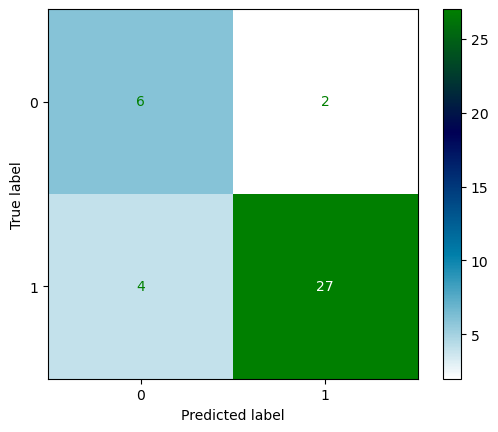

In [148]:
plot_confusion_matrix(model, X_test, y_test,cmap='ocean_r')

In [149]:
print(classification_report(y_test,y_predXGB))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.93      0.87      0.90        31

    accuracy                           0.85        39
   macro avg       0.77      0.81      0.78        39
weighted avg       0.86      0.85      0.85        39

